In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from libraries import *
from FinancialData import *

C:\Users\omirinioui\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
ZCR = ZC_Data_extractor("R:/DR-NATIXIS/ERM/MCRM/LeaderExpert/Stagiaires/2023")
ZC = zero_coupon_bonds(ZCR,2)

irs = IrsPortfolio(100,  first_date=[0], freq=[0.25,0.5,1], Nominal=[10**4], maturity=list(np.arange(1, 7, 0.5)),
                  fix_rate=[0.02, 0.05], exercice=['payer'], SEED=1999)
irs.print_as_dict()

{'first_reset_date': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'swap_freq': array([0.25, 0.25, 0.25, 0.5 , 1.  , 1.  , 1.  , 0.5 , 1.  , 0.25, 0.25,
        0.25, 0.5 , 0.25, 0.25, 0.5 , 0.25, 1.  , 1.  , 1.  , 0.25, 0.5 ,
        1.  , 0.5 , 0.5 , 1.  , 1.  , 0.25, 1.  , 0.25, 0.5 , 0.5 , 1.  ,
        0.25, 0.5 , 0.25, 0.5 , 0.5 , 0.5 , 0.5 , 0.25, 0.25, 0.25, 1.  ,
        0.25, 0.5 , 0.25, 1.  , 0.25, 1.  , 0.25, 1.  , 1.  , 1.  , 0.5 ,
        1.  , 1.  , 1.  , 1.  , 0.25, 0.5 , 1.  , 1.  , 0.5 , 1.  , 0.25,
        0.5 , 1.  , 0.25, 1.  , 0.5 , 1.  , 0.25, 1.  , 0.5 , 1.  , 1.  ,
        1.  , 1.  , 0.25, 0.25, 0.25, 1.  , 0.25, 1.  , 1.  , 0.25, 0.5 ,
        0.5 , 1.  , 0.5 , 0.25, 1

In [5]:
# LGM parameter's  
sig, lam = 0.005 , 0.01
#recovery rate & defult probability parameter :
R, lamda = 0.4, 0.005

In [7]:
import pickle
#load MC data
path_data = r'C:\Users\omirinioui\PycharmProjects\Hadil_proj\Code\Bayesian Quad for CVA\BQ CVA Swap Portfolio\Data\MC_data'
with open(path_data+'/MC_P100payerATM', 'rb') as f1:
    EE_MC = pickle.load(f1)
    mc_df =  pickle.load(f1)
    X_paths = pickle.load(f1)

## Results with the same diffusion :

In [8]:
T = irs.last_maturity
diffusion = Diffusion(0, T,int(T*360) +1 , sig,lam, NBR_SCENARIOS=10**4, pb_measure='Terminal at t')
diffusion.X_diff = X_paths

Time Calcul :  402.05861377716064
83.76266684577402


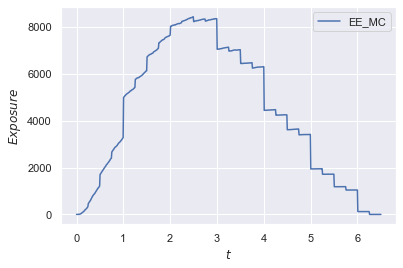

In [12]:
import time
time_grid = np.linspace(0,T,700)
tt = time.time()
EE_MC2 = np.array([Expected_exposure_MC(t, irs, diffusion, ZC) for t in time_grid])
PD_full = np.array([ lamda * np.exp(-lamda *t) for t in time_grid])
Y_MC = (1-R)*EE_MC2*PD_full
print('Time Calcul : ', time.time()-tt)

print((np.diff(time_grid)*Y_MC[1:]).sum())

plt.plot(time_grid, EE_MC2, label="EE_MC")
plt.legend()
plt.xlabel(r"$t$")
plt.ylabel(r"$Exposure$")
plt.grid(True)


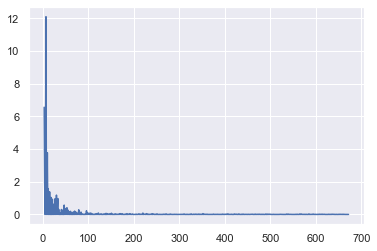

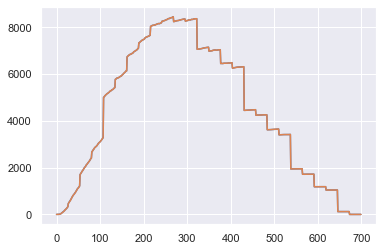

In [13]:
plt.plot((100*np.abs(EE_MC - EE_MC2)/EE_MC)[0:])
plt.show()
plt.plot(EE_MC)
plt.plot(EE_MC2)

## Results with different diffusion :

In [14]:
diffusion = Diffusion(0, T,int(T*360) +1 , sig,lam, NBR_SCENARIOS=10**4, pb_measure='Terminal at t')
diffusion.X_diff - X_paths

In [ ]:
import time
time_grid = np.linspace(0,T,700)
tt = time.time()
EE_MC2 = np.array([Expected_exposure_MC(t, irs, diffusion, ZC) for t in time_grid])
PD_full = np.array([ lamda * np.exp(-lamda *t) for t in time_grid])
Y_MC = (1-R)*EE_MC2*PD_full
print('Time Calcul : ', time.time()-tt)

print((np.diff(time_grid)*Y_MC[1:]).sum())

plt.plot(time_grid, EE_MC2, label="EE_MC")
plt.legend()
plt.xlabel(r"$t$")
plt.ylabel(r"$Exposure$")
plt.grid(True)


In [ ]:
plt.plot((100*np.abs(EE_MC - EE_MC2)/EE_MC)[0:])
plt.show()
plt.plot(EE_MC)
plt.plot(EE_MC2)